# Prédiction d’un modèle issu de données réelles

Dans cette partie, on va essayer de prédit le modèle issu des données réelles, on utilisant le noyau sinc qui nous a donner les meilleures résultats d’après le tableau de l'erreur précédant

## Lecture des données :

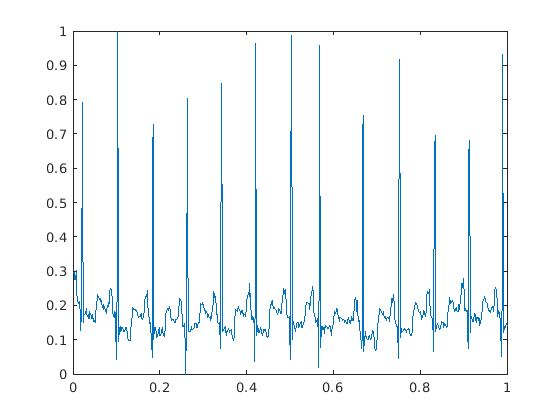

In [192]:
clear all;
fid = fopen("data/100.dat", 'r');
time = 10;
data = fread(fid, 2*360*time, 'ubit12');
x = 1:length(data);
X = [x', data];
% numRows = size(X, 1);

% % Create a random permutation of row indices
% permIndices = randperm(numRows);

% % Use the permutation to shuffle the rows of the data
% X = X(permIndices, :);
X_train = X(1:10:length(X), 1);
X_test = X(2:10:length(X), 1);
y_train = X(1:10:length(X), 2);
y_test  = X(2:10:length(X), 2);
y_train = (y_train - min(y_train)) / (max(y_train) - min(y_train));
X_train = (X_train - min(X_train)) / (max(X_train) - min(X_train));
y_test  = (y_test - min(y_test)) / (max(y_test) - min(y_test));
X_test  = (X_test - min(X_test)) / (max(X_test) - min(X_test));
[X_train, indices] = sort(X_train);
y_train = y_train(indices);
[X_test, indices] = sort(X_test);
y_test = y_test(indices);
% plot(x, data)
plot(X_train, y_train);

## Construction du noyau : 

In [193]:
n = length(X);
n2 = length(X_train);
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end
end    

## Equation normale : 


err =

    0.5897



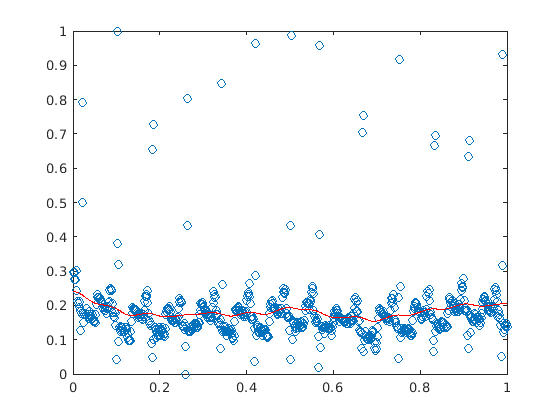

In [194]:
w_et = (K' * K + 0.01 * eye(size(K, 2))) \ (K' * y_train);
y_et = K * w_et;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
hold off
err = norm(y_train - y_et) / norm(y_et)


err =

    3.5115



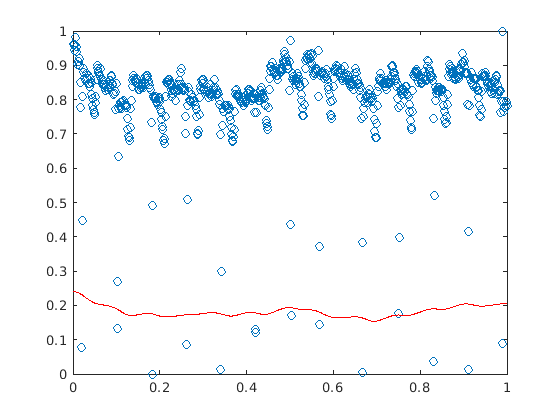

In [195]:
K_test = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K_test(i, j) = noyau(X_train(i, :), X_test(j, :), 5);
  end
end
y_et_test = K_test * w_et;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_et_test, 'r')
hold off
err = norm(y_test - y_et_test) / norm(y_et_test)

## Gradient descent

In [197]:
alpha = 1;
omega = ones(n2, 1);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);
J = @(omega, y) 1/n * norm(K * omega - y);
num_iterations = 400;
i = 1;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.842942e-03
Nombre d'iteration : 400


err =

    0.6126



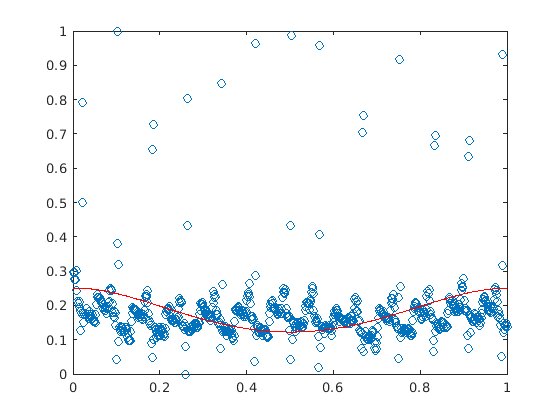

In [198]:
y_pred = K * omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_pred, 'r')
hold off
err = norm(y_train - y_pred) / norm(y_pred)


err =

    3.4394



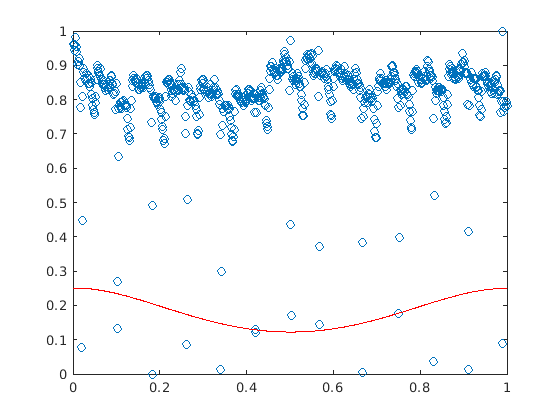

In [199]:
y_pred_test = K_test * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_pred_test, 'r')
hold off
err = norm(y_test - y_pred_test) / norm(y_pred_test)